In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurando visualização de tabelas
pd.set_option('display.width', 1000)

In [ ]:
# Carregando o dataset do Kaggle
from google.colab import files
files.upload()  # Faça upload do arquivo kaggle.json

Saving Global_AI_Content_Impact_Dataset.csv to Global_AI_Content_Impact_Dataset.csv


{'Global_AI_Content_Impact_Dataset.csv': b'Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)\nSouth Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73\nChina,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02\nUSA,2022,Automotive,81.06,96.13,10.66,45.6,39.66,Stable Diffusion,Moderate,54.47,22.76\nFrance,2021,Legal,85.24,93.76,27.7,78.24,29.45,Claude,Moderate,51.84,1.93\nFrance,2021,Gaming,78.95,45.62,17.45,1.05,21.7,Midjourney,Strict,41.77,21.41\nUSA,2021,Retail,66.95,47.72,0.86,27.58,64.42,ChatGPT,Lenient,68.14,8.09\nAustralia,2023,Media,68.23,6.14,6.2,53.13,53.16,Claude,Moderate,71.6,15.26\nUK,2023,Gaming,91.27,33.87,41.67,56.26,59.93,ChatGPT,Moderate,46.98,28.51\nCanada,2025,Education,17.02,87.77,4.59,52.45,64.72,Claude,Moderate,60.55,

In [ ]:
# Configurando a API do Kaggle e baixando o dataset
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d atharvasoundankar/impact-of-ai-on-digital-media-2020-2025
!unzip impact-of-ai-on-digital-media-2020-2025.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open impact-of-ai-on-digital-media-2020-2025.zip, impact-of-ai-on-digital-media-2020-2025.zip.zip or impact-of-ai-on-digital-media-2020-2025.zip.ZIP.


In [ ]:
# Carregando e visualizando o dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')

print("Visão geral do dataset:")
df

Visão geral do dataset:


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77.21,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78.74,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81.58,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47.42,43.11


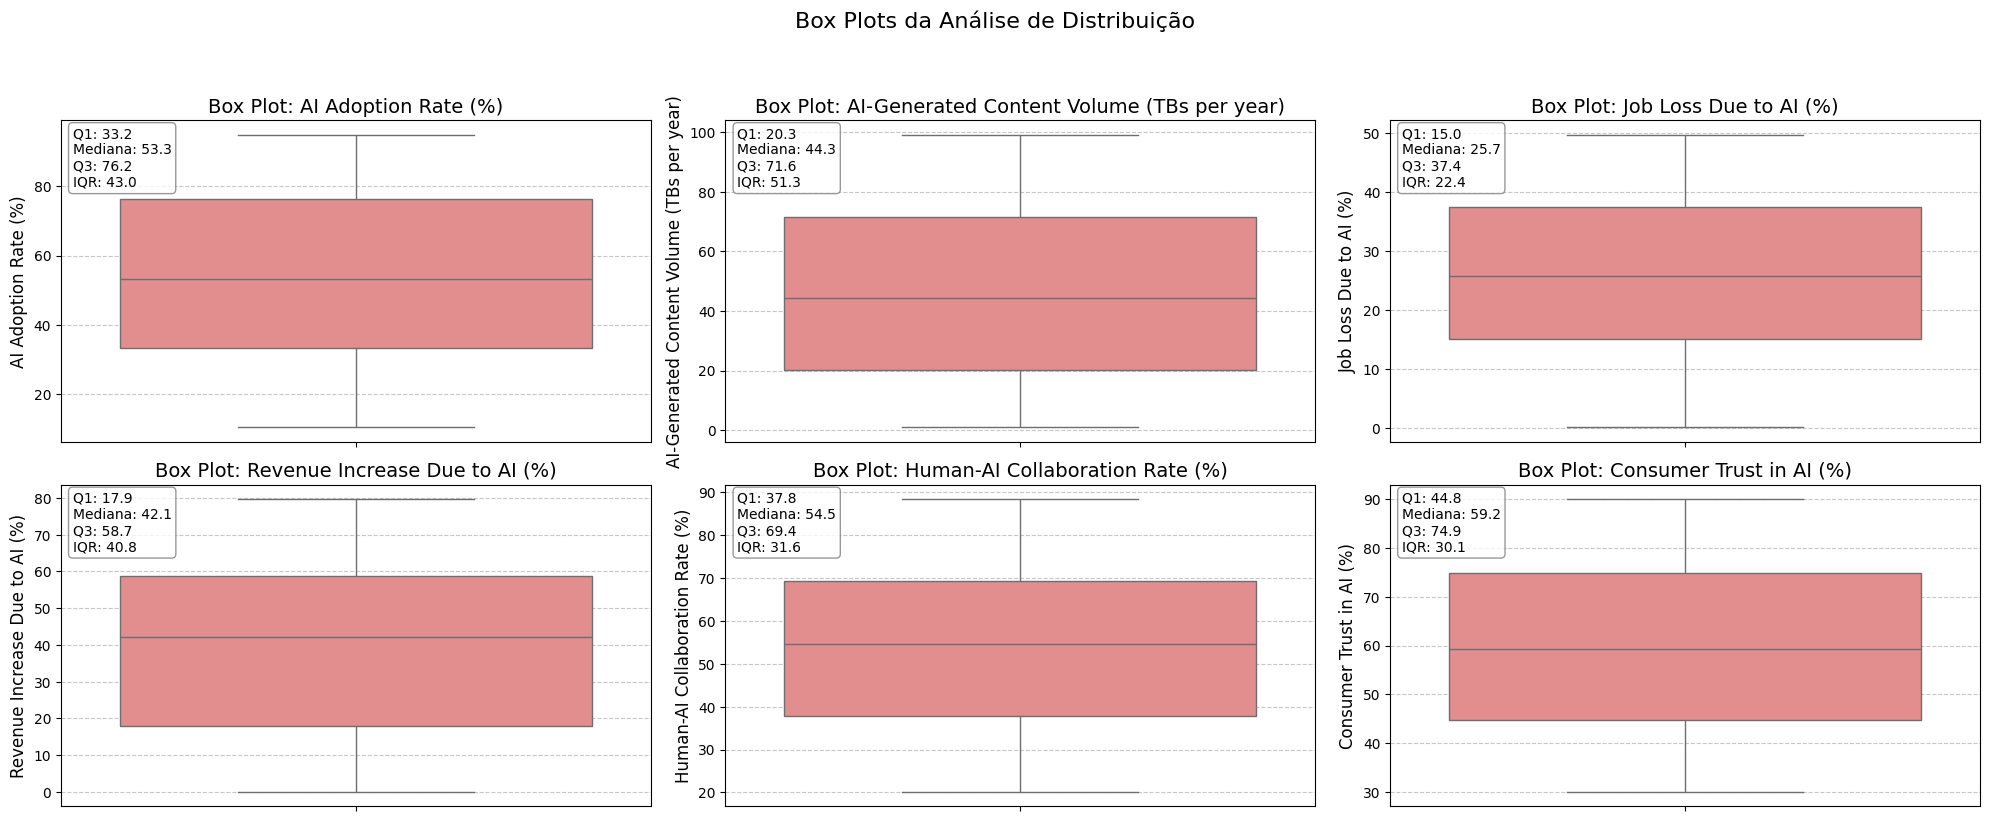


Observações dos Box Plots:
- Os box plots mostram a distribuição dos dados através dos quartis (Q1, Q2, Q3).
- A linha central representa a mediana (Q2).
- A caixa representa o intervalo interquartil (IQR = Q3 - Q1).
- Os 'bigodes' se estendem até 1.5 × IQR além das bordas da caixa.
- Pontos além dos bigodes são considerados outliers potenciais.

=== ANÁLISE DE OUTLIERS ===

AI Adoption Rate (%):
  Limite inferior: -31.27
  Limite superior: 140.72
  Número de outliers: 0

 Nenhum outlier encontrado.

AI-Generated Content Volume (TBs per year):
  Limite inferior: -56.62
  Limite superior: 148.57
  Número de outliers: 0

 Nenhum outlier encontrado.

Job Loss Due to AI (%):
  Limite inferior: -18.64
  Limite superior: 71.05
  Número de outliers: 0

 Nenhum outlier encontrado.

Revenue Increase Due to AI (%):
  Limite inferior: -43.28
  Limite superior: 119.88
  Número de outliers: 0

 Nenhum outlier encontrado.

Human-AI Collaboration Rate (%):
  Limite inferior: -9.68
  Limite superior:

In [ ]:
# ESTATÍSTICA DESCRITIVA - PARTE 1: BOX PLOTS

colunas_numericas = df.select_dtypes(include='number').columns.drop(['Year', 'Market Share of AI Companies (%)'])

# Criando box plots para visualizar a distribuição dos dados

plt.figure(figsize=(20, 12))
for i, coluna in enumerate(colunas_numericas):
  plt.subplot(3, 3, i+1)
  sns.boxplot(y=df[coluna], color='lightcoral')
  plt.title(f'Box Plot: {coluna}', fontsize=14)
  plt.ylabel(coluna, fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Adicionando estatísticas no gráfico
  q1 = df[coluna].quantile(0.25)
  q2 = df[coluna].quantile(0.50)  # mediana
  q3 = df[coluna].quantile(0.75)
  iqr = q3 - q1

  plt.text(0.02, 0.98, f'Q1: {q1:.1f}\nMediana: {q2:.1f}\nQ3: {q3:.1f}\nIQR: {iqr:.1f}',
            transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.suptitle('Box Plots da Análise de Distribuição', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\nObservações dos Box Plots:")
print("- Os box plots mostram a distribuição dos dados através dos quartis (Q1, Q2, Q3).")
print("- A linha central representa a mediana (Q2).")
print("- A caixa representa o intervalo interquartil (IQR = Q3 - Q1).")
print("- Os 'bigodes' se estendem até 1.5 × IQR além das bordas da caixa.")
print("- Pontos além dos bigodes são considerados outliers potenciais.")


print("\n=== ANÁLISE DE OUTLIERS ===")
for coluna in colunas_numericas:
  q1 = df[coluna].quantile(0.25)
  q3 = df[coluna].quantile(0.75)
  iqr = q3 - q1
  limite_inferior = q1 - 1.5 * iqr
  limite_superior = q3 + 1.5 * iqr

  outliers = df[(df[coluna]<limite_inferior) | (df[coluna]>limite_superior)]

  print(f"\n{coluna}:")
  print(f"  Limite inferior: {limite_inferior:.2f}")
  print(f"  Limite superior: {limite_superior:.2f}")
  print(f"  Número de outliers: {len(outliers)}")

  if len(outliers) > 0:
    print(f" \n Países com outliers: {', '.join(outliers['Country'].tolist())}")
    print(outliers[['Country', coluna]])
  else:
    print("\n Nenhum outlier encontrado.")

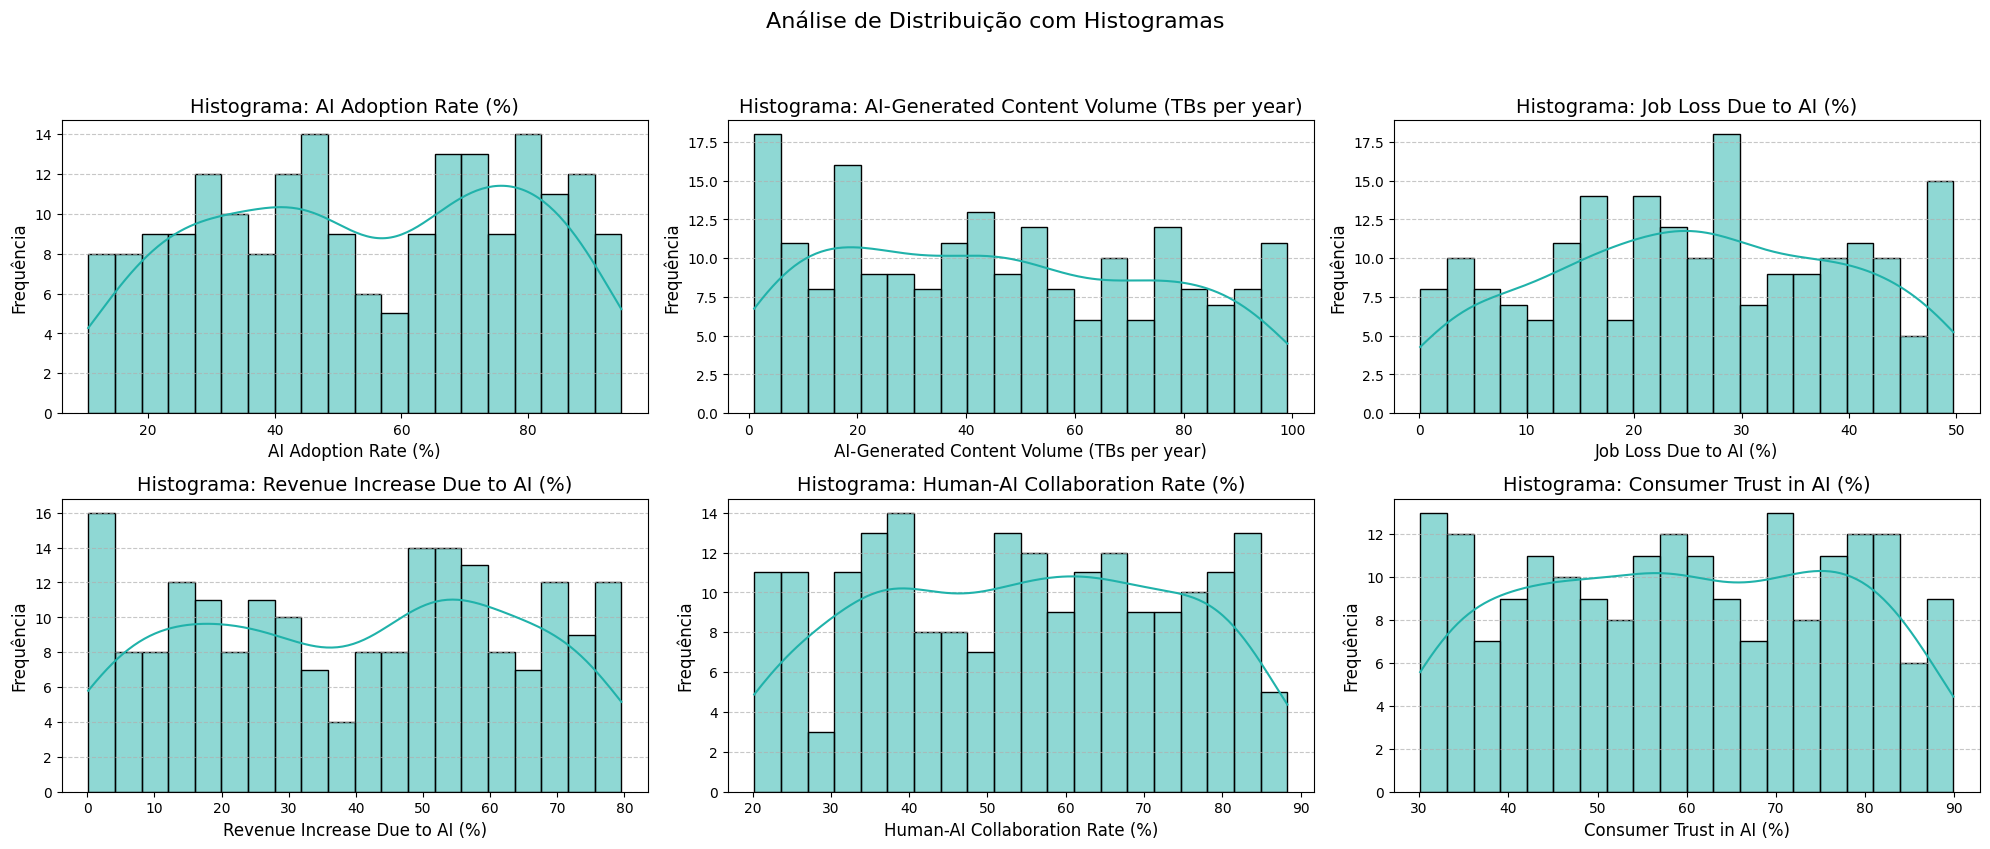


Observações dos Histogramas:
- Os histogramas nos mostram a frequência de valores em diferentes intervalos.
- A curva KDE (Kernel Density Estimate) ajuda a visualizar a forma da distribuição.
- Podemos identificar se a distribuição se aproxima de uma normal, é assimétrica, ou multimodal.


In [ ]:
# ESTATÍSTICA DESCRITIVA - PARTE 2: HISTOGRAMAS
# Criando histogramas para visualizar a forma das distribuições
plt.figure(figsize=(20, 12))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[coluna], kde=True, bins=20, color='lightseagreen')
    plt.title(f'Histograma: {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Análise de Distribuição com Histogramas', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


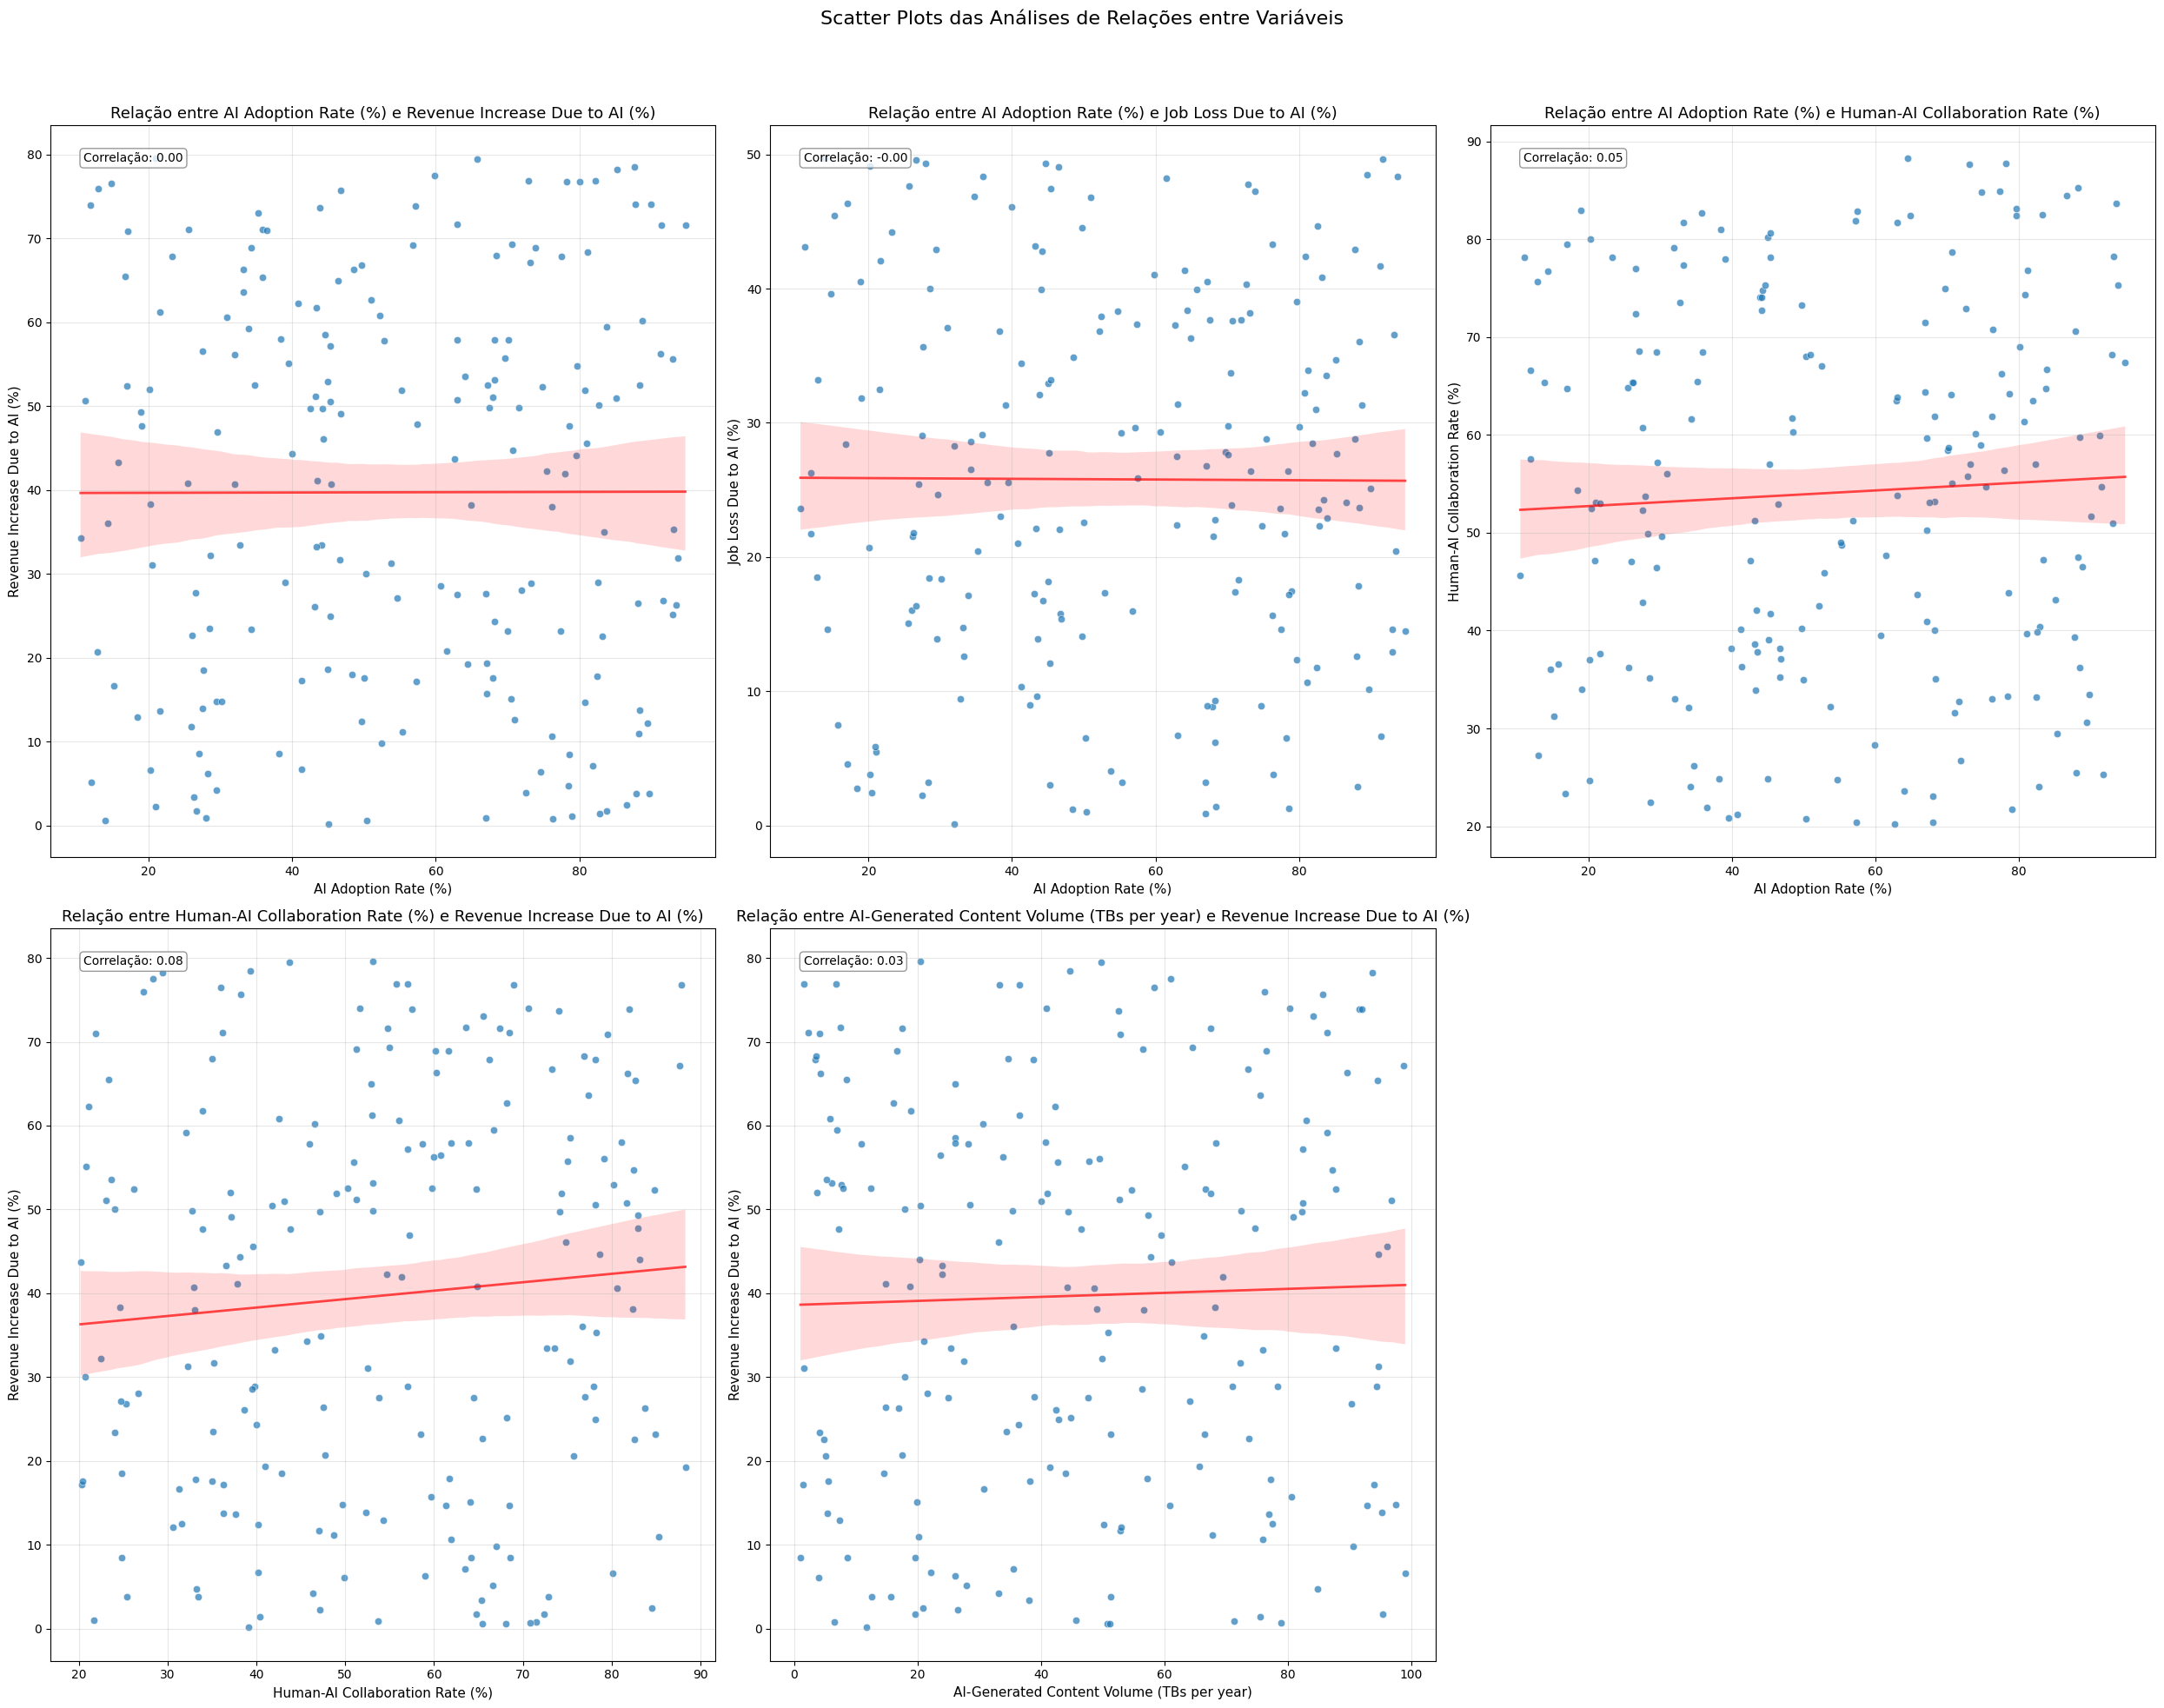


Observações dos Scatter Plots:
- Os gráficos de dispersão nos mostram as relações entre pares de variáveis.
- Pontos que formam padrões indicam relação entre as variáveis (linear, quadrática, etc).
- A linha de tendência ajuda a visualizar a direção geral da relação.
- O coeficiente de correlação quantifica a força e direção da relação linear.


In [ ]:
# ESTATÍSTICA DESCRITIVA - PARTE 3: SCATTER PLOTS
# Definindo pares de variáveis para análise do scatter
pares_scatter = [
    ('AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)'),
    ('AI Adoption Rate (%)', 'Job Loss Due to AI (%)'),
    ('AI Adoption Rate (%)', 'Human-AI Collaboration Rate (%)'),
    ('Human-AI Collaboration Rate (%)', 'Revenue Increase Due to AI (%)'),
    ('AI-Generated Content Volume (TBs per year)', 'Revenue Increase Due to AI (%)')
]

# Criando scatter plots para visualizar relações entre variáveis
plt.figure(figsize=(25, 20))
for i, (x, y) in enumerate(pares_scatter):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[x], y=df[y], alpha=0.7)

    sns.regplot(x=df[x], y=df[y], scatter=False,
                line_kws={"color":"red", "alpha":0.7, "lw":2})

    plt.title(f'Relação entre {x} e {y}', fontsize=13)
    plt.xlabel(x, fontsize=11)
    plt.ylabel(y, fontsize=11)
    plt.grid(alpha=0.3)

    corr = df[x].corr(df[y])
    plt.annotate(f'Correlação: {corr:.2f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.suptitle('Scatter Plots das Análises de Relações entre Variáveis', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

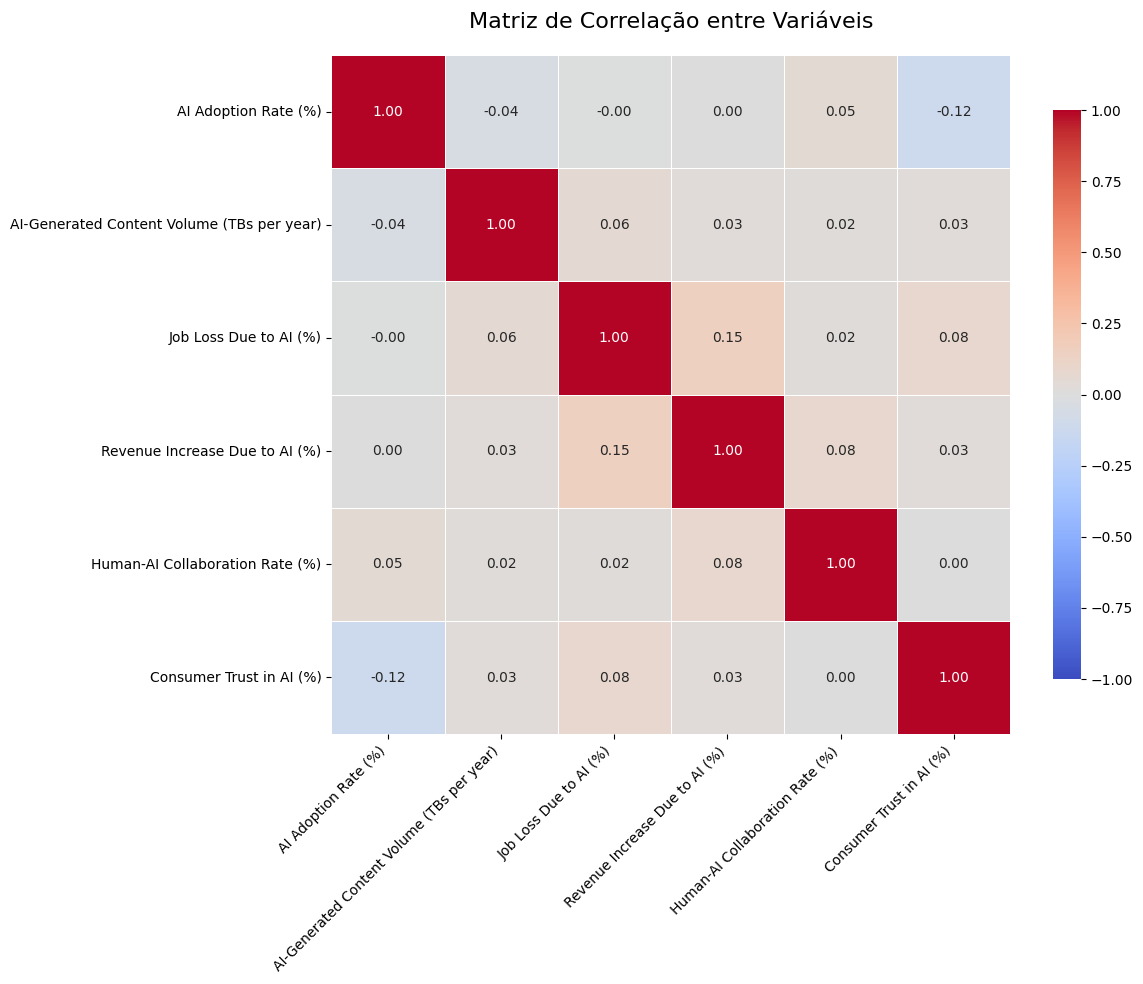

In [ ]:
# ESTATÍSTICA DESCRITIVA - PARTE 4: MAPA DE CALOR (HEATMAP)

colunas_corr = colunas_numericas.copy()

# Calculando matriz de correlação
matriz_corr = df[colunas_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            cbar_kws={"shrink": .8}, square=True, vmin=-1, vmax=1)

plt.title('Matriz de Correlação entre Variáveis', fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


=== NORMALIZAÇÃO (NORMAL PADRÃO) ===

Variável: AI Adoption Rate (%)
Média original: 54.27
Desvio padrão original: 24.22
Média normalizada: -0.00000000
Desvio padrão normalizado: 1.00000000
--------------------------------------------------
Variável: Revenue Increase Due to AI (%)
Média original: 39.72
Desvio padrão original: 23.83
Média normalizada: 0.00000000
Desvio padrão normalizado: 1.00000000
--------------------------------------------------
Variável: AI-Generated Content Volume (TBs per year)
Média original: 46.07
Desvio padrão original: 29.16
Média normalizada: -0.00000000
Desvio padrão normalizado: 1.00000000
--------------------------------------------------

Primeiras linhas do DataFrame com valores normalizados:
       Country  AI Adoption Rate (%)  Revenue Increase Due to AI (%)  AI-Generated Content Volume (TBs per year)  AI Adoption Rate (%)_normalizado  Revenue Increase Due to AI (%)_normalizado  AI-Generated Content Volume (TBs per year)_normalizado
0  South Korea    

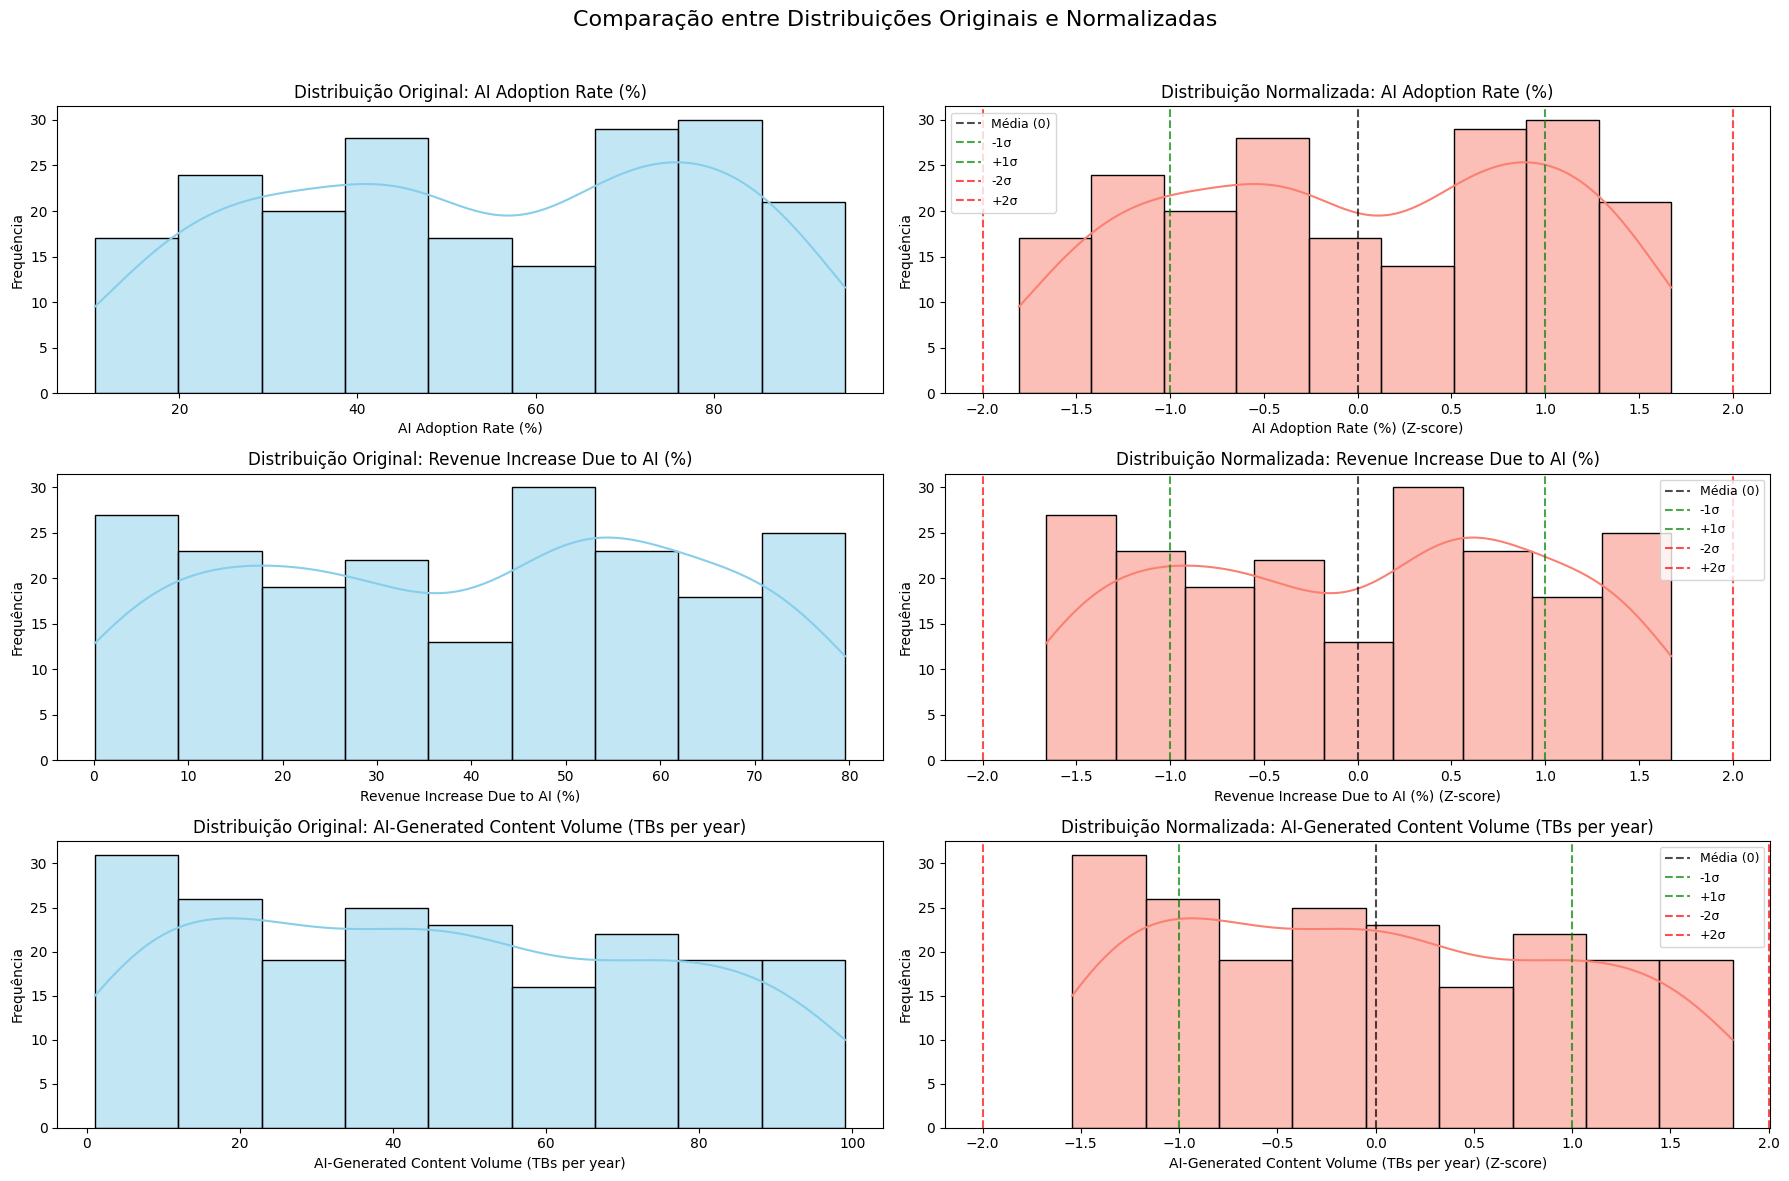


Observações sobre a Normalização:
- A normalização Z-score transforma os dados para terem média 0 e desvio padrão 1.
- Esta transformação preserva a forma da distribuição, apenas mudando a escala.
- Os valores normalizados representam quantos desvios padrão um dado está da média.
- Dados entre -1 e 1 representam aproximadamente 68% das observações em uma distribuição normal.
- Dados entre -2 e 2 representam aproximadamente 95% das observações em uma distribuição normal.


In [ ]:
# NORMAL PADRÃO - Normalização de variáveis
print("=== NORMALIZAÇÃO (NORMAL PADRÃO) ===\n")

var_normalizacao = ['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)',
                          'AI-Generated Content Volume (TBs per year)']
df_normalizado = df.copy()

# Aplicando normalização Z-score para cada variável
for var in var_normalizacao:
    media = df[var].mean()
    desvio = df[var].std()

    # Aplicando fórmula Z = (X - μ) / σ
    df_normalizado[f'{var}_normalizado'] = (df[var] - media) / desvio

    print(f"Variável: {var}")
    print(f"Média original: {media:.2f}")
    print(f"Desvio padrão original: {desvio:.2f}")
    print(f"Média normalizada: {df_normalizado[f'{var}_normalizado'].mean():.8f}")
    print(f"Desvio padrão normalizado: {df_normalizado[f'{var}_normalizado'].std():.8f}")
    print("-" * 50)

# Exibindo primeiras linhas do dataframe normalizado
print("\nPrimeiras linhas do DataFrame com valores normalizados:")
colunas_mostrar = ['Country'] + [var for var in var_normalizacao] + [f'{var}_normalizado' for var in var_normalizacao]
print(df_normalizado[colunas_mostrar].head(10))

plt.figure(figsize=(18, 12))

for i, var in enumerate(var_normalizacao):
    # Histograma original
    plt.subplot(3, 2, i*2+1)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribuição Original: {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Frequência')

    # Histograma normalizado
    plt.subplot(3, 2, i*2+2)
    sns.histplot(df_normalizado[f'{var}_normalizado'], kde=True, color='salmon')
    plt.title(f'Distribuição Normalizada: {var}', fontsize=12)
    plt.xlabel(f'{var} (Z-score)')
    plt.ylabel('Frequência')


    plt.axvline(0, color='black', linestyle='--', alpha=0.7, label='Média (0)')
    plt.axvline(-1, color='green', linestyle='--', alpha=0.7, label='-1σ')
    plt.axvline(1, color='green', linestyle='--', alpha=0.7, label='+1σ')
    plt.axvline(-2, color='red', linestyle='--', alpha=0.7, label='-2σ')
    plt.axvline(2, color='red', linestyle='--', alpha=0.7, label='+2σ')
    plt.legend(fontsize=9)

plt.suptitle('Comparação entre Distribuições Originais e Normalizadas', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

=== DISTRIBUIÇÕES AMOSTRAIS ===


=== Distribuição Amostral para: AI Adoption Rate (%) ===
Total de observações na população: 200
Média populacional: 54.27
Desvio padrão populacional: 24.16
--------------------------------------------------
Tamanho da amostra: 5
Média das médias amostrais: 54.23
Desvio padrão das médias amostrais (erro padrão observado): 10.63
Erro padrão teórico (σ/√n): 10.80
------------------------------
Tamanho da amostra: 15
Média das médias amostrais: 54.29
Desvio padrão das médias amostrais (erro padrão observado): 6.22
Erro padrão teórico (σ/√n): 6.24
------------------------------
Tamanho da amostra: 30
Média das médias amostrais: 54.28
Desvio padrão das médias amostrais (erro padrão observado): 4.31
Erro padrão teórico (σ/√n): 4.41
------------------------------

=== Distribuição Amostral para: Revenue Increase Due to AI (%) ===
Total de observações na população: 200
Média populacional: 39.72
Desvio padrão populacional: 23.77
---------------------------------

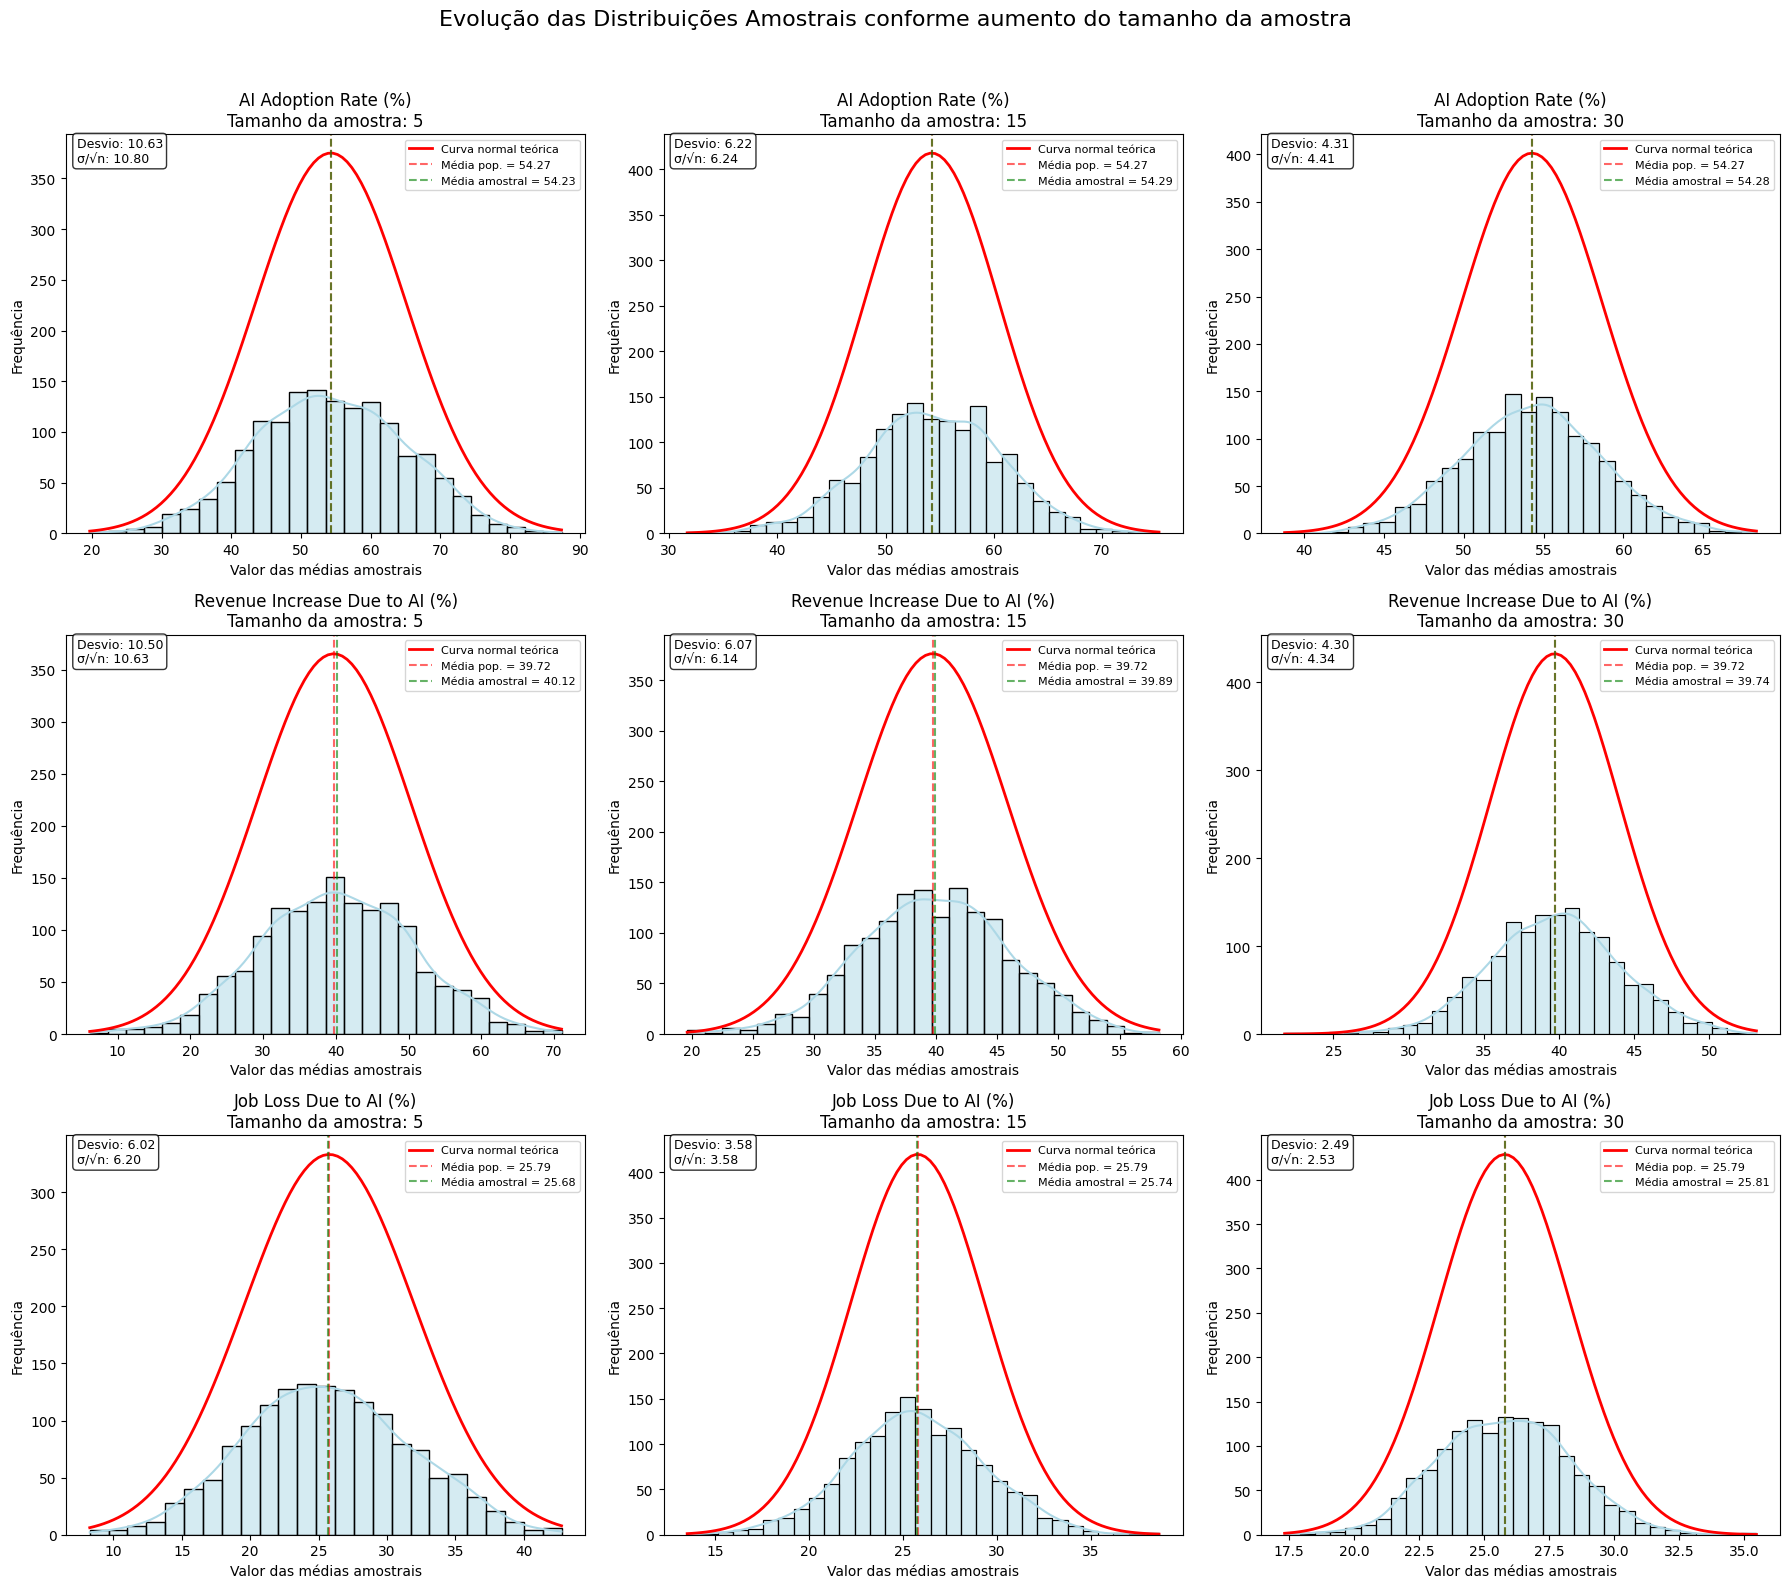

In [ ]:
# DISTRIBUIÇÕES AMOSTRAIS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=== DISTRIBUIÇÕES AMOSTRAIS ===\n")

variaveis = ['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)', 'Job Loss Due to AI (%)']

n_amostras = 1500  # Número de amostras
tamanhos_amostra = [5, 15, 30]

plt.figure(figsize=(18, 16))

for var_idx, variavel in enumerate(variaveis):
    # Obtendo dados da população
    dados = df[variavel].dropna().values
    n_pop = len(dados)
    media_populacional = np.mean(dados)
    desvio_pop = np.std(dados)

    print(f"\n=== Distribuição Amostral para: {variavel} ===")
    print(f"Total de observações na população: {n_pop}")
    print(f"Média populacional: {media_populacional:.2f}")
    print(f"Desvio padrão populacional: {desvio_pop:.2f}")
    print("-" * 50)

    for i, tamanho in enumerate(tamanhos_amostra):
        medias_amostrais = np.zeros(n_amostras)

        for j in range(n_amostras):
            amostra = np.random.choice(dados, size=tamanho, replace=True)
            medias_amostrais[j] = np.mean(amostra)

        media_amostral = np.mean(medias_amostrais)
        desvio_amostral = np.std(medias_amostrais)
        erro_padrao_teorico = desvio_pop / np.sqrt(tamanho)
        print(f"Tamanho da amostra: {tamanho}")
        print(f"Média das médias amostrais: {media_amostral:.2f}")
        print(f"Desvio padrão das médias amostrais (erro padrão observado): {desvio_amostral:.2f}")
        print(f"Erro padrão teórico (σ/√n): {erro_padrao_teorico:.2f}")

        pos = i + 1 + var_idx * len(tamanhos_amostra)
        plt.subplot(len(variaveis), len(tamanhos_amostra), pos)
        sns.histplot(medias_amostrais, kde=True, color='lightblue')
        x = np.linspace(min(medias_amostrais), max(medias_amostrais), 100)
        y = stats.norm.pdf(x, media_populacional, erro_padrao_teorico)
        plt.plot(x, y * n_amostras * (max(medias_amostrais) - min(medias_amostrais)) / 10,
                 'r-', linewidth=2, label='Curva normal teórica')

        plt.axvline(media_populacional, color='red', linestyle='--', alpha=0.6,
                   label=f'Média pop. = {media_populacional:.2f}')
        plt.axvline(media_amostral, color='green', linestyle='--', alpha=0.6,
                   label=f'Média amostral = {media_amostral:.2f}')

        plt.title(f'{variavel}\nTamanho da amostra: {tamanho}', fontsize=12)
        plt.xlabel("Valor das médias amostrais")
        plt.ylabel("Frequência")
        plt.legend(fontsize=8, loc='upper right')

        plt.annotate(f'Desvio: {desvio_amostral:.2f}\nσ/√n: {erro_padrao_teorico:.2f}',
                    xy=(0.02, 0.93), xycoords='axes fraction', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

        print("-" * 30)

plt.suptitle('Evolução das Distribuições Amostrais conforme aumento do tamanho da amostra', fontsize=16, y=0.99)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

=== INTERVALOS DE CONFIANÇA PARA A MÉDIA POPULACIONAL ===


Variável: AI Adoption Rate (%)
Tamanho da amostra: 200
Média amostral: 54.27
Desvio padrão amostral: 24.22
--------------------------------------------------
Intervalo de Confiança de 90%:
IC = [51.44, 57.10]
Margem de erro: ±2.83
Interpretação: Com 90% de confiança, podemos afirmar que
a verdadeira média populacional de AI Adoption Rate (%) está entre 51.44 e 57.10.
------------------------------
Intervalo de Confiança de 95%:
IC = [50.89, 57.64]
Margem de erro: ±3.38
Interpretação: Com 95% de confiança, podemos afirmar que
a verdadeira média populacional de AI Adoption Rate (%) está entre 50.89 e 57.64.
------------------------------

Variável: Revenue Increase Due to AI (%)
Tamanho da amostra: 200
Média amostral: 39.72
Desvio padrão amostral: 23.83
--------------------------------------------------
Intervalo de Confiança de 90%:
IC = [36.93, 42.50]
Margem de erro: ±2.78
Interpretação: Com 90% de confiança, podemos afirmar q

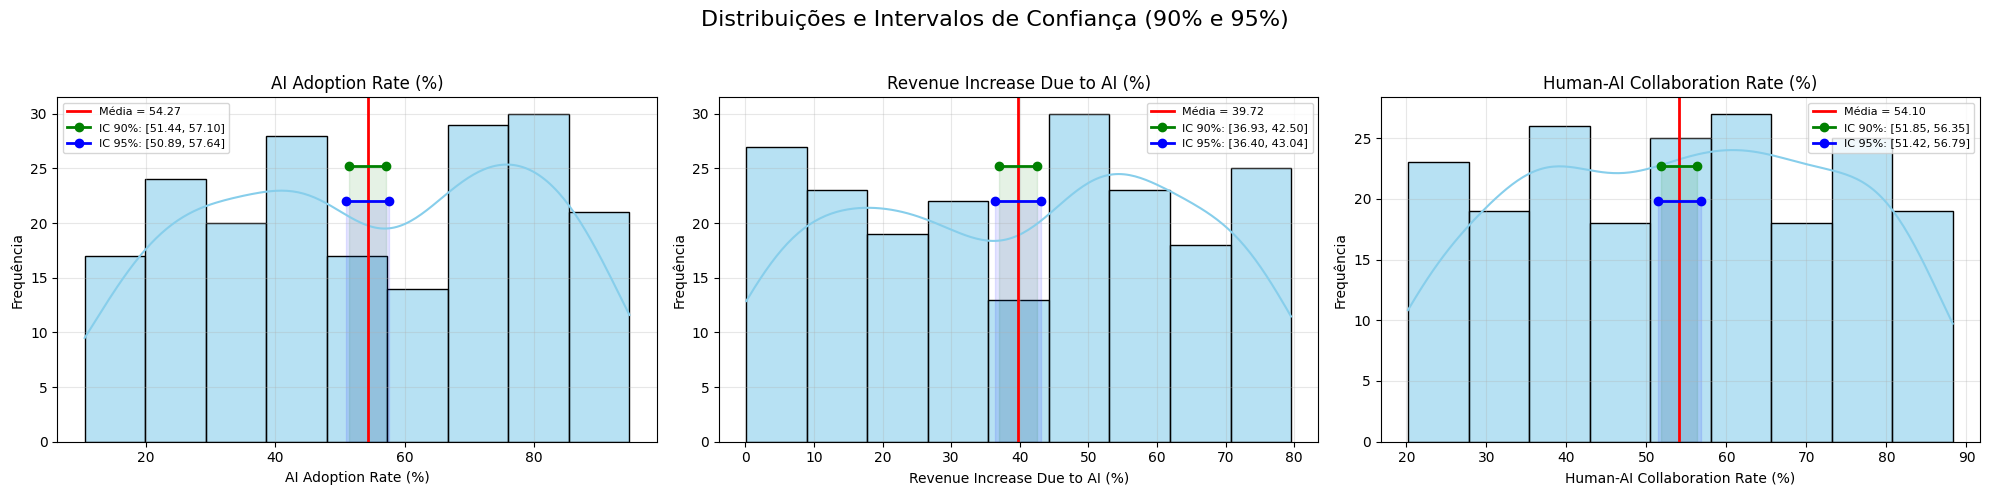

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

print("=== INTERVALOS DE CONFIANÇA PARA A MÉDIA POPULACIONAL ===\n")

var_ic = ['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)']
niveis_confianca = [0.90, 0.95]  # 90% e 95%

# Para armazenar os dados para os gráficos
graficos_info = []

for variavel in var_ic:
    dados = df[variavel].dropna()
    n = len(dados)
    media = np.mean(dados)
    desvio_padrao = np.std(dados, ddof=1)

    print(f"\nVariável: {variavel}")
    print(f"Tamanho da amostra: {n}")
    print(f"Média amostral: {media:.2f}")
    print(f"Desvio padrão amostral: {desvio_padrao:.2f}")
    print("-" * 50)

    intervalos = []
    for conf in niveis_confianca:
        t_critico = stats.t.ppf((1 + conf) / 2, df=n-1)
        erro_padrao = desvio_padrao / np.sqrt(n)
        margem_erro = t_critico * erro_padrao

        ic_inferior = media - margem_erro
        ic_superior = media + margem_erro

        print(f"Intervalo de Confiança de {conf*100:.0f}%:")
        print(f"IC = [{ic_inferior:.2f}, {ic_superior:.2f}]")
        print(f"Margem de erro: ±{margem_erro:.2f}")
        print(f"Interpretação: Com {conf*100:.0f}% de confiança, podemos afirmar que")
        print(f"a verdadeira média populacional de {variavel} está entre {ic_inferior:.2f} e {ic_superior:.2f}.")
        print("-" * 30)

        intervalos.append((conf, ic_inferior, ic_superior))

    graficos_info.append((variavel, dados, media, intervalos))

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, (variavel, dados, media, intervalos) in enumerate(graficos_info):
    ax = axs[i]
    sns.histplot(dados, kde=True, color='skyblue', alpha=0.6, ax=ax)
    ax.axvline(media, color='red', linestyle='-', linewidth=2,
               label=f'Média = {media:.2f}')

    y_max = ax.get_ylim()[1]
    y_pos = [y_max * 0.8, y_max * 0.7]
    colors = ['green', 'blue']

    for j, (conf, ic_inf, ic_sup) in enumerate(intervalos):
        ax.plot([ic_inf, ic_sup], [y_pos[j], y_pos[j]], marker='o',
                markersize=6, linewidth=2, color=colors[j],
                label=f'IC {conf*100:.0f}%: [{ic_inf:.2f}, {ic_sup:.2f}]')
        ax.fill_between([ic_inf, ic_sup], [0, 0], [y_pos[j], y_pos[j]],
                        alpha=0.1, color=colors[j])

    ax.set_title(f'{variavel}', fontsize=12)
    ax.set_xlabel(variavel, fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)

plt.suptitle('Distribuições e Intervalos de Confiança (90% e 95%)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
